# Capstone Project — The Battle of Neighbourhoods
Introduction
New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .
Questions that can be asked using the above mentioned datasets
What is best location in New Delhi City for Chinese Cuisine ?
Which areas have large number of Chinese Resturant Market ?
Which all areas have less number of resturant ?
Which is the best place to stay if I prefer Chinese Cuisine ?
What places are have best restaurant in New Delhi?
Data
For this project we need the following data :

New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
Data source : Zomato kaggel dataset
Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
Nearby places in each locality of new delhi city.
Data source : Fousquare API
Description : By using this api we will get all the venues in each neighborhood.

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

# Read the zomato resturant data from csv file


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

# Data Cleaning
remove the unwanted columns and rows from dataset


In [4]:

df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [6]:

df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

created map to show the restaurant cluters

In [7]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [8]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

# What places are have best restaurant in New Delhi?

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

<Figure size 900x500 with 1 Axes>

The best restarants are available in Kesbah, Greater Kailash area.



# what places are have worst restaurants in New Delhi?


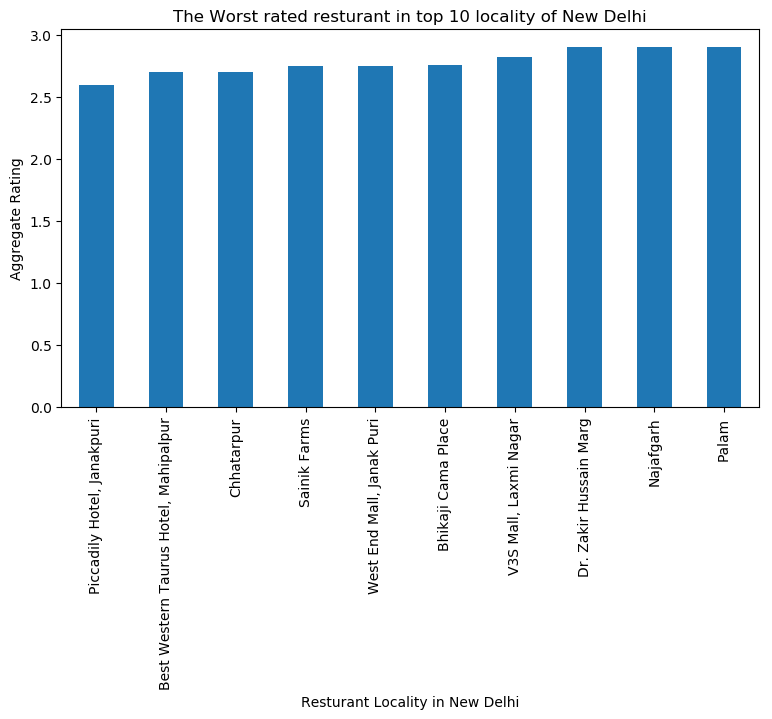

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in Piccadily Hotel, Janakpuri.



# Which place are suitable for edible person in New Delhi city?

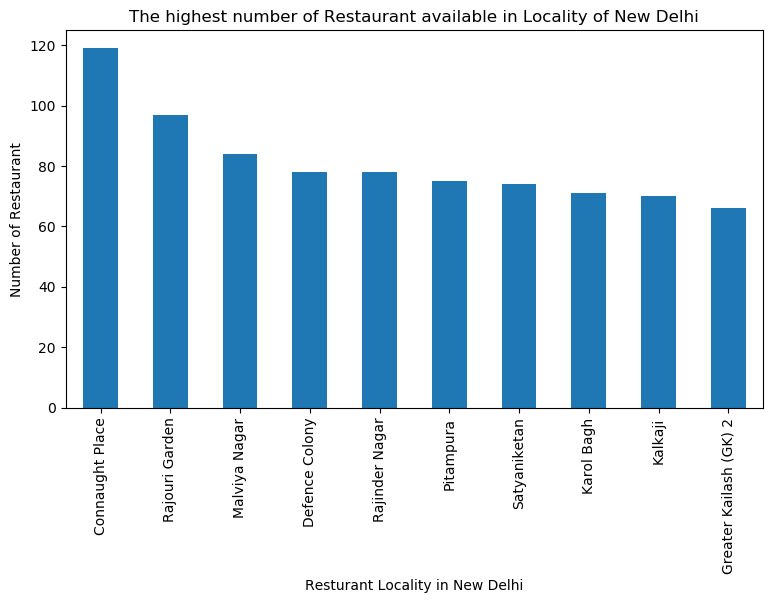

In [11]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


Connaught Place is the best places for edible person to stay there.



# Which place are not suitable for edible person in New Delhi city?


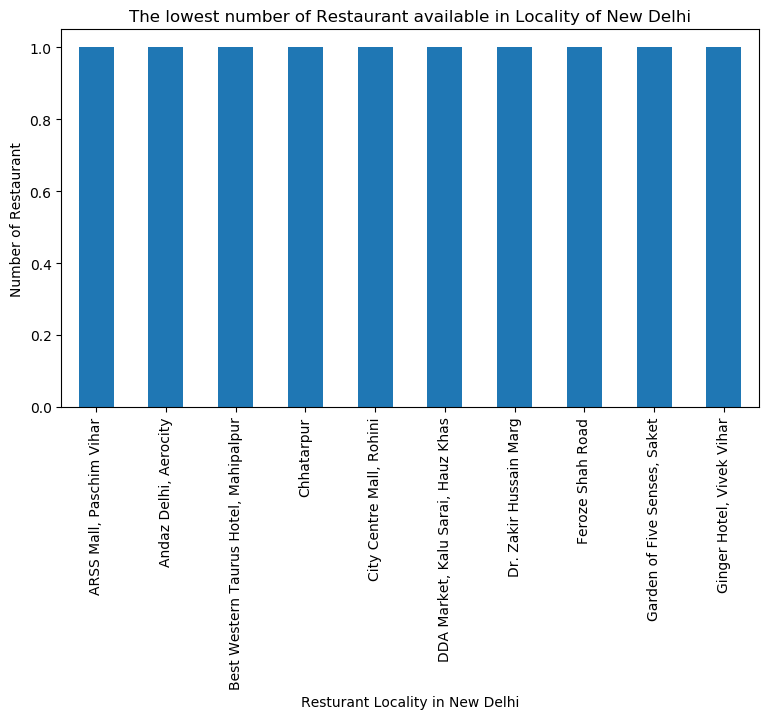

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


# What are the best places for chinese restaurant in New Delhi city


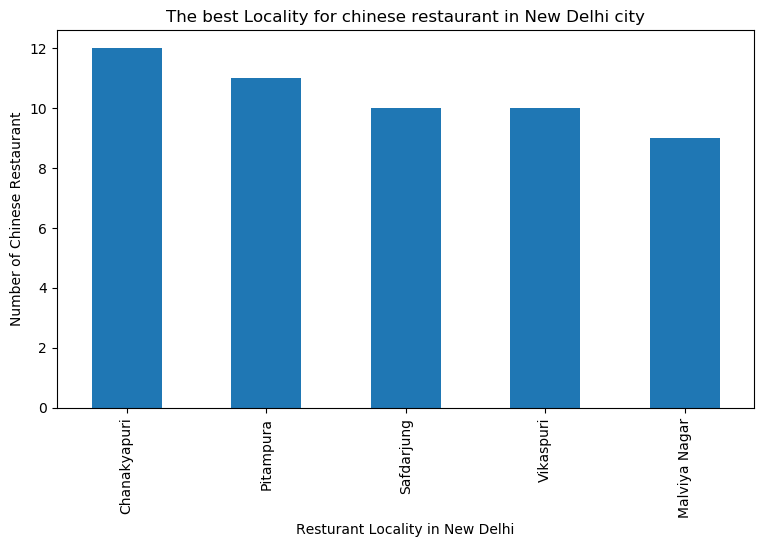

In [13]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

# which places are the best chinese resturants in New Delhi?

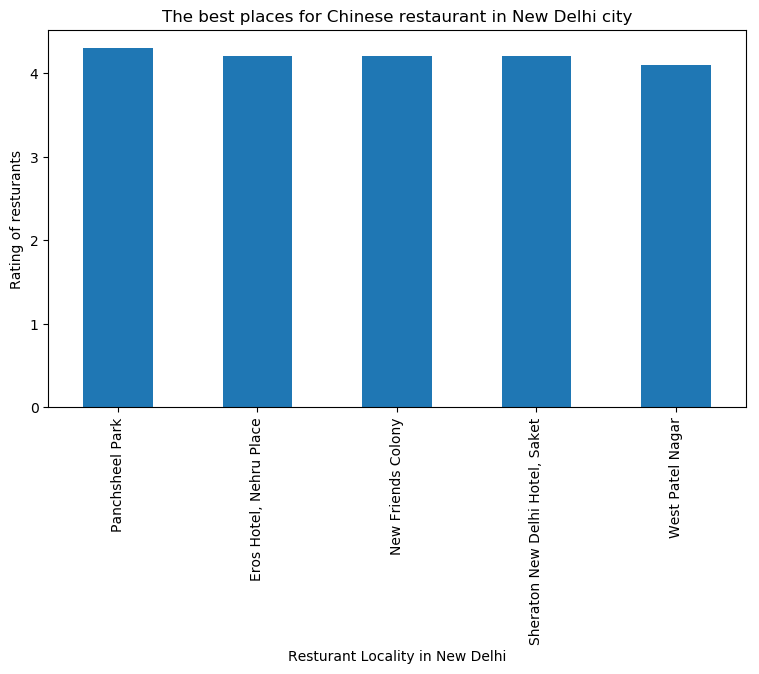

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

Panchsheel park is best Chinese resturants.

Data transformation
Based on Locality grouping the data

In [16]:

df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [17]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [20]:
df_final.shape

(240, 8)

# Define Foursquare Credentials and Version

In [21]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


# create a function to repeat the same process to all the Locality in New Delhi


In [22]:

## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# find the venues in all New Delhi Locality


In [27]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [28]:

new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1  Baljeet's Amritsari Koolcha       28.665768        77.100481   
2                    Pizza Hut       28.670321        77.103853   
3              Café Coffee Day       28.670009        77.102480   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1   Indian Restaurant  
2         Pizza Place  
3         Coffee Shop  
4  Chinese Restaurant

In [29]:

new_Delhi_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                       10   
Adchini                                                         7   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   4   
Aggarwal City Plaza, Rohini                                     8   
Alaknanda                                                       4   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     5   
Andaz Delhi, Aerocity                                          24   
Ansal Plaza Mall, Khel Gaon Marg                                5   
Asaf Ali Road                                                   6   
Ashok Vihar Phase 1                                             7   
Ashok Vihar Phase 2                                             6   
Ashok Vihar Phase 3                                             4   
Barakhamba Road                                                16   
Basant Lok Market, Vasant Vihar                                26   
Bellagio, Ashok Vihar Phase 2                                   6   
Best Western Taurus Hotel, Mahipalpur                          11   
Bhikaji Cama Place                                             11   
Chanakyapuri                                                    5   
Chander Nagar                                                   1   
Chandni Chowk                                                  16   
Chawri Bazar                                                    6   
Chhatarpur                                                      5   
Chittaranjan Park                                               5   
City Centre Mall, Rohini                                        8   
City Square Mall, Rajouri Garden                               22   
Civil Lines                                                     5   
...                                                           ...   
The Lalit New Delhi, Barakhamba Road                            6   
The Leela Ambience Convention Hotel                             4   
The Leela Palace, Chanakyapuri                                 12   
The Lodhi, Lodhi Road                                          16   
The Park, Connaught Place                                      24   
The Suryaa New Delhi, New Friends Colony                       22   
The Taj Mahal Hotel, Mansingh Road                              6   
The Taj Palace Hotel, Chanakyapuri                             34   
The Uppal, Aerocity                                             4   
The Village Restaurant Complex, Khel Gaon Marg                 11   
Tilak Nagar                                                     4   
Tughlakabad Institutional Area                                  5   
Uday Park                                                       6   
Unity One Mall, Janakpuri                                       6   
Uttam Nagar                                                     2   
V3S Mall, Laxmi Nagar                                          15   
Vasant Kunj                                                     7   
Vasant Square Mall, Vasant Kunj                                 9   
Vasant Vihar                                                   27   
Vasundhara Enclave                                              1   
Vijay Nagar                                                    13   
Vikas Marg                                                      4   
Vikaspuri                                                       4   
Vivek Vihar                                                     7   
West End Mall, Janak Puri                                      15   
West Gate Mall, Rajouri Garden                

In [30]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 212 uniques categories.


In [31]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  African Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                   0   
1  ARSS Mall, Paschim Vihar    0                  0                   0   
2  ARSS Mall, Paschim Vihar    0                  0                   0   
3  ARSS Mall, Paschim Vihar    0                  0                   0   
4  ARSS Mall, Paschim Vihar    0                  0                   0   

   Airport  Airport Lounge  Airport Service  Airport Terminal  \
0        0               0                0                 0   
1        0               0                0                 0   
2        0               0                0                 0   
3        0               0                0                 0   
4        0               0                0                 0   

   American Restaurant  Andhra Restaurant  ...  Trail  Train Station  \
0                    0                  0  ...      0              0   
1                    0                  0  ...      0              0   
2                    0                  0  ...      0              0   
3                    0                  0  ...      0              0   
4                    0                  0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 213 columns]

In [32]:

New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality  ATM  Accessories Store  \
0                          ARSS Mall, Paschim Vihar  0.1           0.100000   
1                                           Adchini  0.0           0.000000   
2                     Aditya Mega Mall, Karkardooma  0.0           0.000000   
3                                          Aerocity  0.0           0.000000   
4                     Aggarwal City Mall, Pitampura  0.0           0.000000   
5                       Aggarwal City Plaza, Rohini  0.0           0.000000   
6                                         Alaknanda  0.0           0.000000   
7                        Ambience Mall, Vasant Kunj  0.0           0.000000   
8                                         Anand Lok  0.0           0.000000   
9                                       Anand Vihar  0.0           0.000000   
10                            Andaz Delhi, Aerocity  0.0           0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.0           0.000000   
12                                    Asaf Ali Road  0.0           0.000000   
13                              Ashok Vihar Phase 1  0.0           0.000000   
14                              Ashok Vihar Phase 2  0.0           0.000000   
15                              Ashok Vihar Phase 3  0.0           0.000000   
16                                  Barakhamba Road  0.0           0.000000   
17                  Basant Lok Market, Vasant Vihar  0.0           0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.0           0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.0           0.090909   
20                               Bhikaji Cama Place  0.0           0.000000   
21                                     Chanakyapuri  0.0           0.000000   
22                                    Chander Nagar  0.0           0.000000   
23                                    Chandni Chowk  0.0           0.000000   
24                                     Chawri Bazar  0.0           0.000000   
25                                       Chhatarpur  0.0           0.000000   
26                                Chittaranjan Park  0.0           0.000000   
27                         City Centre Mall, Rohini  0.0           0.000000   
28                 City Square Mall, Rajouri Garden  0.0           0.000000   
29                                      Civil Lines  0.0           0.000000   
..                                              ...  ...                ...   
209            The Lalit New Delhi, Barakhamba Road  0.0           0.000000   
210             The Leela Ambience Convention Hotel  0.0           0.000000   
211                  The Leela Palace, Chanakyapuri  0.0           0.000000   
212                           The Lodhi, Lodhi Road  0.0           0.000000   
213                       The Park, Connaught Place  0.0           0.000000   
214        The Suryaa New Delhi, New Friends Colony  0.0           0.000000   
215              The Taj Mahal Hotel, Mansingh Road  0.0           0.000000   
216              The Taj Palace Hotel, Chanakyapuri  0.0           0.000000   
217                             The Uppal, Aerocity  0.0           0.000000   
218  The Village Restaurant Complex, Khel Gaon Marg  0.0           0.000000   
219                                     Tilak Nagar  0.0           0.000000   
220                  Tughlakabad Institutional Area  0.0           0.000000   
221                                       Uday Park  0.0           0.000000   
222                       Unity One Mall, Janakpuri  0.0           0.000000   
223                                     Uttam Nagar  0.5           0.000000   
224                           V3S Mall, Laxmi Nagar  0.0           0.000000   
225                                     Vasant Kunj  0.0           0.000000   
226                 Vasant Square Mall, Vasant Kunj  0.0           0.000000   
227                                    Vasant Vihar  0.0           0.000000   
228           

In [33]:
New_Delhi_grouped.shape


(239, 213)

In [34]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant   0.2
1                             ATM   0.1
2                  Sandwich Place   0.1
3              Chinese Restaurant   0.1
4  Multicuisine Indian Restaurant   0.1


----Adchini----
               venue  freq
0                Pub  0.29
1               Café  0.29
2  Indian Restaurant  0.14
3   Parsi Restaurant  0.14
4              Hotel  0.14


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1          Multiplex   0.2
2  Indian Restaurant   0.2
3      Shopping Mall   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1           Coffee Shop  0.14
2        Airport Lounge  0.14
3  Fast Food Restaurant  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0    Chinese Restaurant  0.25
1      Department Store  0.25
2               

                venue  freq
0         Coffee Shop  0.09
1    Asian Restaurant  0.07
2  Italian Restaurant  0.07
3                Café  0.07
4       Shopping Mall  0.07


----DLF Place Mall, Saket----
               venue  freq
0  Indian Restaurant  0.11
1             Lounge  0.07
2     Clothing Store  0.07
3                Bar  0.07
4               Café  0.05


----DLF Promenade Mall, Vasant Kunj----
                venue  freq
0         Coffee Shop  0.09
1    Asian Restaurant  0.07
2  Italian Restaurant  0.07
3                Café  0.07
4       Shopping Mall  0.07


----DLF South Square, Sarojini Nagar----
                  venue  freq
0     Indian Restaurant  0.33
1  Fast Food Restaurant  0.17
2         Shopping Mall  0.08
3            Restaurant  0.08
4                Market  0.08


----Daryaganj----
               venue  freq
0  Indian Restaurant  0.33
1              Hotel  0.17
2         Restaurant  0.17
3             Hostel  0.08
4      Movie Theater  0.08


----Defence Colony---

                 venue  freq
0  Government Building  0.25
1          Music Venue  0.25
2   Light Rail Station  0.25
3            Rest Area  0.25
4                  ATM  0.00


----JMD Kohinoor Mall, Greater Kailash----
            venue  freq
0      Restaurant  0.16
1     Pizza Place  0.11
2  Ice Cream Shop  0.11
3            Café  0.11
4   Shopping Mall  0.05


----JNU----
               venue  freq
0     Clothing Store  0.25
1      Shopping Mall  0.25
2  Indian Restaurant  0.25
3               Café  0.25
4             Office  0.00


----JW Marriott New Delhi----
                 venue  freq
0                Hotel  0.33
1    Indian Restaurant  0.07
2          Coffee Shop  0.07
3  Japanese Restaurant  0.04
4   Punjabi Restaurant  0.04


----Jail Road----
                 venue  freq
0    Indian Restaurant  0.29
1          Pizza Place  0.14
2    Indian Sweet Shop  0.14
3       Ice Cream Shop  0.14
4  Fried Chicken Joint  0.14


----Jama Masjid----
                venue  freq
0   Indian 

                venue  freq
0    Asian Restaurant  0.33
1         Coffee Shop  0.11
2  Tibetan Restaurant  0.11
3         Bus Station  0.11
4               Hotel  0.11


----Malviya Nagar----
                venue  freq
0         Coffee Shop   0.2
1  Miscellaneous Shop   0.1
2          Donut Shop   0.1
3         Pizza Place   0.1
4    Asian Restaurant   0.1


----Mandi House----
               venue  freq
0            Theater  0.20
1        Art Gallery  0.13
2             Bakery  0.13
3               Café  0.13
4  Indian Restaurant  0.13


----Mathura Road----
                         venue  freq
0            Indian Sweet Shop  0.33
1           Light Rail Station  0.33
2               Breakfast Spot  0.33
3                          ATM  0.00
4  Northeast Indian Restaurant  0.00


----Mayapuri Phase 2----
                         venue  freq
0                       Garden  0.25
1                   Food Truck  0.25
2                   Restaurant  0.25
3                        Hotel  0.25

       venue  freq
0       Café   0.5
1      Hotel   0.5
2        ATM   0.0
3     Office   0.0
4  Multiplex   0.0


----Pride Plaza Hotel, Aerocity----
                 venue  freq
0                Hotel  0.35
1          Coffee Shop  0.08
2    Indian Restaurant  0.08
3  Japanese Restaurant  0.04
4            Hotel Bar  0.04


----Punjabi Bagh----
                venue  freq
0       Garden Center  0.14
1   Convenience Store  0.14
2  Chinese Restaurant  0.14
3         Coffee Shop  0.14
4   Indian Restaurant  0.14


----Qutab Institutional Area----
                        venue  freq
0           Indian Restaurant  0.25
1                  Restaurant  0.25
2         Moroccan Restaurant  0.12
3                  Food Truck  0.12
4  Modern European Restaurant  0.12


----R K Puram----
                     venue  freq
0              Coffee Shop  0.14
1          Thai Restaurant  0.14
2            Shopping Mall  0.14
3        Electronics Store  0.14
4  Comfort Food Restaurant  0.14


----Race Cou

                venue  freq
0   Indian Restaurant  0.20
1           Nightclub  0.20
2  Chinese Restaurant  0.07
3       Shopping Mall  0.07
4         Bus Station  0.07


----The Claridges, Aurangzeb Road----
                      venue  freq
0                     Hotel  0.22
1            History Museum  0.11
2            Breakfast Spot  0.11
3                Smoke Shop  0.11
4  Mediterranean Restaurant  0.11


----The Grand New Delhi, Vasant Kunj----
                  venue  freq
0           Coffee Shop  0.12
1  Fast Food Restaurant  0.08
2        Clothing Store  0.08
3                   ATM  0.04
4      Department Store  0.04


----The Imperial, Janpath----
                      venue  freq
0                     Hotel  0.18
1         Indian Restaurant  0.12
2        Italian Restaurant  0.09
3               Coffee Shop  0.06
4  Mediterranean Restaurant  0.06


----The India Mall, New Friends Colony----
                  venue  freq
0                  Café  0.15
1     Indian Restaurant 

In [35]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [36]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality    1st Most Common Venue  \
0                          ARSS Mall, Paschim Vihar        Indian Restaurant   
1                                           Adchini                      Pub   
2                     Aditya Mega Mall, Karkardooma              Pizza Place   
3                                          Aerocity                    Hotel   
4                     Aggarwal City Mall, Pitampura       Chinese Restaurant   
5                       Aggarwal City Plaza, Rohini     Gym / Fitness Center   
6                                         Alaknanda                   Market   
7                        Ambience Mall, Vasant Kunj              Coffee Shop   
8                                         Anand Lok                  Stadium   
9                                       Anand Vihar                     Café   
10                            Andaz Delhi, Aerocity                    Hotel   
11                 Ansal Plaza Mall, Khel Gaon Marg         Malay Restaurant   
12                                    Asaf Ali Road        Indian Restaurant   
13                              Ashok Vihar Phase 1              Pizza Place   
14                              Ashok Vihar Phase 2              Pizza Place   
15                              Ashok Vihar Phase 3                   Garden   
16                                  Barakhamba Road                   Bakery   
17                  Basant Lok Market, Vasant Vihar                     Café   
18                    Bellagio, Ashok Vihar Phase 2              Pizza Place   
19            Best Western Taurus Hotel, Mahipalpur                    Hotel   
20                               Bhikaji Cama Place                   Lounge   
21                                     Chanakyapuri       African Restaurant   
22                                    Chander Nagar              Pizza Place   
23                                    Chandni Chowk        Indian Restaurant   
24                                     Chawri Bazar           Hardware Store   
25                                       Chhatarpur      Japanese Restaurant   
26                                Chittaranjan Park                   Market   
27                         City Centre Mall, Rohini            Shopping Mall   
28                 City Square Mall, Rajouri Garden     Fast Food Restaurant   
29                                      Civil Lines       Chinese Restaurant   
..                                              ...                      ...   
209            The Lalit New Delhi, Barakhamba Road        Indian Restaurant   
210             The Leela Ambience Convention Hotel              Pizza Place   
211                  The Leela Palace, Chanakyapuri        Indian Restaurant   
212                           The Lodhi, Lodhi Road        Indian Restaurant   
213                       The Park, Connaught Place                    Hotel   
214        The Suryaa New Delhi, New Friends Colony                     Café   
215              The Taj Mahal Hotel, Mansingh Road                Hotel Bar   
216              The Taj Palace Hotel, Chanakyapuri        Indian Restaurant   
217                             The Uppal, Aerocity                    Hotel   
218  The Village Restaurant Complex, Khel Gaon Marg                      Bar   
219                                     Tilak Nagar  North Indian Restaurant   
220                  Tughlakabad Institutional Area                   Market   
221                                       Uday Park                   Market   
222                       Unity One Mall, Janakpuri       Chinese Restaurant   
223                                     Uttam Nagar                      ATM   
224                           V3S Mall, Laxmi Nagar        Indian Restaurant   
225                                     Vasant Kunj     Fast Food Restaurant   
226                 Vasant Square Mall, Vasant Kunj       Chinese Restaurant   
227                                    Vasa

In [40]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(239,)

In [42]:
# add clustering labels
New_Delhi_merged = df_final.head(239)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               4   
1  Average, Good, Poor, Very Good         1560               1   
2                   Average, Good          434               3   
3                         Average           59               0   
4                         Average          126               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM                Market   
1                   Pub                  Café     Indian Restaurant   
2           Pizza Place     Indian Restaurant         Shopping Mall   
3                 Hotel  Fast Food Restaurant   Rental Car Location   
4    Chinese Restaurant  Fast Food Restaurant                  Café   

  4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop      Chinese Restaurant        Sandwich Place   
1      Parsi Restaurant                   Hotel         Women's Store   
2             Multiplex                   Hotel                  Café   
3        Airport Lounge             Coffee Shop      Airport Terminal   
4      Department Store  Furniture / Home Store    Frozen Yogurt Shop   

            7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Multicuisine Indian Restaurant           Pizza Place     Accessories Store   
1              Falafel Restaurant   Fried Chicken Joint     French Restaurant   
2              Falafel Restaurant     French Restaurant            Food Truck   
3               Fish & Chips Shop           Flea Market                  Food   
4             Fried Chicken Joint     French Restaurant            Food Truck   

  10th Most Common Venue  
0                  Hotel  
1             Food Truck  
2             Food Court  
3          Women's Store  
4             Food Court

In [43]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [44]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
125  28.627715    3.125000                        Average, Good          171   
128  28.608252    2.945000                        Average, Good          406   
146  28.535040    3.175000                        Average, Good           60   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
163  28.552711    3.100000                              Average            7   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
169  28.667261    3.200000                              Average           76   
174  28.550802    3.250000                        Average, Good           34   
189  28.620715    3.880000             Average, Good, Very Good          626   
197  28.592724    2.985714                              Average          560   
205  28.600171    3.714286             Average, Good, Very Good         1733   
207  28.625445    3.600000             Average, Good, Very Good          843   
213  28.623619    3.466667                        Average, Good         1141   
217  28.535183    3.066667                              Average           37   
220  28.523519    3.700000                                 Good          281   
235  28.652978    3.500000                                 Good          178   
236  28.648177    3.675000             Average, Good, Very Good          876   
238  28.559928    3.075000                        Average, Good          923   

     Cluster Labels 1st Most Common Venue     2nd Most Common Venue  \
3                 0                 Hotel      Fast Food Restaurant   
10                0                 Hotel               Coffee Shop   
19                0                 Hotel        Italian Restaurant   
25                0   Japanese Restaurant         Indian Restaurant   
35                0                 Hotel               Pizza Place   
56                0                 Hotel          Sculpture Garden   
60                0                 Hotel          Asian Restaurant   
69                0                 Hotel         Indian Restaurant   
70                0                 Hotel                Restaurant   
72                0                Garden                      Park   
74                0                 Hotel         Indian Restaurant   
83                0                 Hotel         Indian Restaurant   
111               0                 Hotel         Indian Restaurant   
112               0                 Hotel         Indian Restaurant   
119               0                 Hotel                 Hotel Bar   
120               0    Light Rail Station        Chinese Restaurant   
125

In [45]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]


Lat  Agg_Rating                                   Comments  \
1    28.537063    3.292308             Average, Good, Poor, Very Good   
4    28.690020    3.033333                                    Average   
9    28.659870    3.281481                              Average, Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
135  28.579641    3.180000                              Average, Good   
162  28.725814    3.050000                                    Average   
175  28.546931    3.223077                              Average, Good   
180  28.534499    3.000000                        Average, Good, Poor   
190  28.577107    3.100000                                    Average   
210  28.661133    3.775000                            Good, Very Good   
228  28.596073    3.052941                              Average, Good   
229  28.692519    3.606452        Average, Excellent, Good, Very Good   
230  28.658041    3.400000                                    Average   

     No_of_Votes  Cluster Labels    1st Most Common Venue  \
1           1560               1                      Pub   
4            126               1       Chinese Restaurant   
9           1309               1                     Café   
45         19479               1                     Café   
86          4011               1                     Café   
89           893               1           Soccer Stadium   
135          202               1         Department Store   
162           50               1                    Hotel   
175          606               1                     Café   
180          173               1                     Café   
190          114               1              Pizza Place   
210          460               1              Pizza Place   
228          305               1                     Café   
229        12271               1                     Café   
230           19               1  South Indian Restaurant   

       2nd Most Common Venue    3rd Most Common Venue   4th Most Common Venue  \
1                       Café        Indian Restaurant        Parsi Restaurant   
4       Fast Food Restaurant                     Café        Department Store   
9    South Indian Restaurant             Burger Joint           Burrito Place   
45        Chinese Restaurant              Pizza Place             Coffee Shop   
86                       Gym                   Bakery           Women's Store   
89              Soccer Field                     Café             Pizza Place   
135                     Café  South Indian Restaurant             Pizza Place   
162                     Café            Women's Store    Fast Food Restaurant   
175                   Market       Chinese Restaurant       Indian Restaurant   
180           Ice Cream Shop                     Park           Grocery Store   
190        Convenience Store             Gourmet Shop                    Café   
210        Indian Restaurant                    Hotel                    Café   
228            Women's Store                   Garden  Furniture / Home Store   
229       Chinese Restaurant              Coffee Shop                  Bakery   
230             Burger Joint            Burrito Place                    Café   

      5th Most Common Venue    6th Most Common Venue   7th Most Common Venue  \
1                     Hotel            Women's Store      Falafel Restaurant   
4    Furniture / Home Store       Frozen Yogurt Shop     Fried Chicken Joint   
9             Women's Store              Gaming Cafe      Frozen Yogurt Shop   
45     Fast Food Restaurant  North Indian Restaurant      Light Rail Station   
86                   Garden   Furniture / Home Store      Frozen Yogurt Shop   
89             Dessert Shop       Dim Sum Restaurant  Furniture / Home Store   
135     

In [46]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]


Lat  Agg_Rating                  Comments  No_of_Votes  \
22   28.654105    3.085714                   Average           80   
57   28.699837    3.376471  Average, Good, Very Good         2460   
104  28.656263    3.097619             Average, Good          965   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
22                2           Pizza Place         Women's Store   
57                2           Pizza Place            Food Truck   
104               2           Pizza Place         Women's Store   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
22     Falafel Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   
57          Women's Store    Falafel Restaurant    Frozen Yogurt Shop   
104    Falafel Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
22      French Restaurant            Food Truck            Food Court   
57    Fried Chicken Joint     French Restaurant            Food Court   
104     French Restaurant            Food Truck            Food Court   

    9th Most Common Venue 10th Most Common Venue  
22      Food & Drink Shop                   Food  
57      Food & Drink Shop                   Food  
104     Food & Drink Shop                   Food

In [47]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]


Lat  Agg_Rating                        Comments  No_of_Votes  \
2    28.656131    3.275000                   Average, Good          434   
12   28.641698    3.050000                         Average           17   
23   28.656414    3.358182        Average, Good, Very Good         6668   
33   28.657388    3.320000                   Average, Good          636   
42   28.576161    2.983333             Average, Good, Poor          542   
43   28.643320    3.287500  Average, Good, Poor, Very Good         2570   
46   28.573241    3.225000             Average, Good, Poor         1106   
47   28.681582    3.046875             Average, Good, Poor         1224   
49   28.602169    2.900000                         Average            7   
55   28.617102    4.200000                       Very Good         3010   
61   28.668181    3.400000                         Average           33   
66   28.699373    3.252174                   Average, Good          973   
71   28.641003    3.650000                   Average, Good          367   
77   28.631728    3.060714  Average, Good, Poor, Very Good         1650   
82   28.548371    3.137500             Average, Good, Poor          609   
84   28.630942    3.122000  Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111        Average, Good, Very Good         7411   
92   28.584294    3.100000                         Average           35   
97   28.662972    3.533333              Average, Very Good          293   
98   28.651527    3.490909        Average, Good, Very Good         3222   
99   28.648795    3.238028  Average, Good, Poor, Very Good         7282   
113  28.541242    2.984615                         Average          817   
116  28.486576    2.950000                         Average            8   
118  28.646549    3.200000                         Average           20   
126  28.602860    2.973214             Average, Good, Poor         1831   
133  28.708185    3.344444        Average, Good, Very Good          568   
138  28.556145    3.040909             Average, Good, Poor          637   
140  28.627959    3.004167                         Average          326   
144  28.591092    3.200000             Average, Good, Poor          993   
153  28.608055    3.860000        Average, Good, Very Good         7978   
156  28.630734    3.185714                   Average, Good          244   
158  28.700027    3.157333             Average, Good, Poor         3974   
160  28.712975    3.066667                         Average          121   
165  28.539464    2.900000                         Average           14   
173  28.714176    3.352083  Average, Good, Poor, Very Good         4514   
181  28.571849    3.316667                   Average, Good          472   
199  28.601779    3.700000        Average, Good, Very Good          964   
209  28.631362    3.537500                   Average, Good         1666   
223  28.619954    2.905714                   Average, Poor          242   

     Cluster Labels   1st Most Common Venue 2nd Most Common Venue  \
2                 3             Pizza Place     Indian Restaurant   
12                3       Indian Restaurant                Hostel   
23                3       Indian Restaurant          Dessert Shop   
33                3             Pizza Place     Indian Restaurant   
42                3       Indian Restaurant  Fast Food Restaurant   
43                3       Indian Restaurant                 Hotel   
46                3       Indian Restaurant         Train Station   
47                3                  Market     Indian Restaurant   
49                3       Indian Restaurant    Italian Restaurant   
55                3       Indian Restaurant         Women's Store   
61                3             Pizza Place     Indian Restaurant   
66                3       Indian Restaurant           Snack Place   
71                3       Indian Restaurant                Hostel   
77                3       Indian Restaurant 

In [48]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]


Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
5    28.700516    3.040000                  Average, Good, Poor          594   
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
11   28.562580    3.750000             Average, Good, Very Good          875   
13   28.690182    3.090000                  Average, Good, Poor          971   
14   28.693969    3.378571                        Average, Good         2343   
15   28.691136    3.390909             Average, Good, Very Good          485   
16   28.630440    3.208333                  Average, Good, Poor         1779   
17   28.557846    3.220000                  Average, Good, Poor         1875   
18   28.696302    3.300000                        Average, Good          415   
20   28.568193    2.755556                        Average, Poor          339   
21   28.589797    3.085714                  Average, Good, Poor         1617   
24   28.649658    3.800000  Average, Excellent, Good, Very Good         1410   
26   28.538688    3.130303                  Average, Good, Poor         2578   
27   28.716874    3.400000                              Average          134   
28   28.650254    3.166667                        Average, Good         1217   
29   28.681233    3.300000             Average, Good, Very Good          769   
30   28.561898    3.100000                        Average, Good         1514   
31   28.632091    3.779832  Average, Excellent, Good, Very Good       128107   
32   28.718351    3.150000                        Average, Good          494   
34   28.720602    3.600000                                 Good          119   
36   28.692546    3.480000                        Average, Good          948   
37   28.541903    3.000000                              Average            4   
38   28.702961    3.225000                        Average, Good          168   
39   28.543269    3.650000                                 Good          201   
40   28.528657    3.700000             Average, Good, Very Good         5920   
41   28.542647    3.761538             Average, Good, Very Good         1946   
44   28.574288    3.496154       Average, Good, Poor, Very Good        15579   
..         ...         ...                                  ...          ...   
193  28.569983    3.133333                  Average, Good, Poor          988   
194  28.566717    3.303125             Average, Good, Very Good         2411   
195  28.527731    3.450000                        Average, Good          396   
196  28.680905    3.320000                        Average, Good          286   
198  28.636712    3.023529                        Average, Poor          185   
200  28.564288    3.200000                              Average            6   
201  28.651299    3.500000                        Average, Good          479   
202  28.646593    3.280952             Average, Good, Very Good         1624   
203  28.601187    3.633333                        Average, Good         1018   
204  28.597038    3.533333             Average, Good, Very Good          902   
206  28.538993    3.450000                        Average, Good          242   
208  28.562469    2.971429                  Average, Good, Poor          486   
211  28.579556    3.780000                                 Good          709   
212  28.592147    3.350000                        Average, Good          189   
214  28.561105    3.425000                        Average, Good          246   
215  28.605069    3.785714             Average, Good, Very Good         1976   
216  28.594859    3.800000                      Good, Very Good          287   
218  28.552403    3.833333                      Good, Very Good         1133   
219  28.638

# Conclusion
Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.

Pancsheel park, Nehru place have the best Chinese Resturant.

Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
